# Álgebra Linear e Aplicações (SME0142) - Trabalho Final

Nome: Victor Lucas de Almeida Fernandes


Número USP: 12675399

Link do vídeo: [aqui](https://drive.google.com/file/d/19L_05i7I27-dgnMWjJLzR7eSMVQVAJlk/view?usp=share_link)


# Cadeias de Markov

## Introdução

Escolhi desenvolver o trabalho sobre as cadeias de Markov pois, ao pesquisar sobre o tema, achei muito interessante as suas aplicações.
As principais que encontrei foram no motor de pesquisa do Google (PageRank), na teoria de filas, na modelagem genética de populações e na composição de músicas algorítimicas.

Ademais, por elas estarem intimamente relacionadas com a matéria de estatística, que estou cursando, e de processos estocásticos, do próximo semestre, acredito que além de auxiliar na consolidação dos aprendizados de Álgebra Linear, o trabalho também ajuda em outras disciplinas da graduação.

No entanto, a maior motivação para a escolha desse tópico foram os geradores de texto de Markov, aplicação sobre a qual o trabalho será desenvolvido.

## Parte teórica


### Propriedade de Markov
Um processo estocástico satisfaz a propriedade de Markov quando podemos fazer previsões sobre o seu futuro somente com base no seu estado atual. Assim, desconsideramos a sequência de eventos precedentes no cálculo da distribuição de probabilidade do próximo estado.  



### Cadeia de Markov
Denotamos como cadeia de Markov um processo estocástico que segue a propriedade de markoviana.


### Aplicação da definição nos geradores de texto de Markov

Vamos usar um gerador probabilístico de textos para exemplificar o conceito apresentado.

Considere as seguintes frases como banco de treinamento do nosso algoritmo:
- Oi , tudo bem ?
- Oi , está certo ?
- Oi , está bem ?

Seja cada palavra um estado do nosso processo. Conseguimos definir a distribuição de probabilidade de transição de uma palavra para outra na nossa amostra.

Por exemplo, se o estado atual é a palavra *Oi*, temos 100% de certeza que o próximo estado será uma vírgula.

Se o estado atual é uma vírgula, temos 33% de chance de ir para o estado *tudo* e 67% para o estado *está*.

E assim sucessivamente. Repare que a probabilidade que calculamos para o estado da vírgula não depende do passado do processo, ou seja, da probabilidade do estado *Oi*. Por isso, podemos considerar que estamos tratando de um processo de Markov.

Com base nessa lógica, conseguimos montar a seguinte cadeia de Markov:

![picture](https://drive.google.com/uc?id=1mqU3s-s3mvn4_z2skRmM2eFO4AVX9Ihn)

A aplicação desse conceito que será desenvolvida consiste em um gerador de poemas.

O banco de frases será obtido com base em diversos poemas de amor com palavras semelhantes. O algoritmo irá criar um poema original baseado nas probabilidades de transição de estados de Markov derivadas desse textos.

Ao representar as cadeias computacionalmente, seguindo o nosso exemplo, teríamos o seguinte:
- Oi: [vírgula]
- Vírgula: [está, está, tudo]
- tudo: [bem]
- está: [bem, certo]
- bem: [?]
- certo: [?]


Ao sortear aleatóriamente uma palavra dessa lista de estados sucessores, obtemos a probabilidade desejada.


## Parte prática

In [ ]:
# Importando bibliotecas e o arquivo texto com o banco de frases
import numpy as np
from google.colab import files

files.upload()
bancoDeFrases = open('bancoDeFrases.txt').read()

print(bancoDeFrases)

Saving bancoDeFrases.txt to bancoDeFrases.txt
Amor é um fogo que arde sem se ver;
É ferida que dói, e não se sente;
É um contentamento descontente;
É dor que desatina sem doer.

É um não querer mais que bem querer;
É um andar solitário entre a gente;
É nunca contentar-se e contente;
É um cuidar que ganha em se perder;

É querer estar preso por vontade;
É servir a quem vence, o vencedor;
É ter com quem nos mata, lealdade.

Mas como causar pode seu favor;
Nos corações humanos amizade;
Se tão contrário a si é o mesmo Amor.
Não te quero senão porque te quero;
e de querer-te a não querer-te chego;
e de esperar-te quando não te espero;
passa meu coração do frio ao fogo.

Quero-te apenas porque a ti eu quero;
a ti odeio sem fim e, odiando-te, te suplico;
e a medida do meu amor viajante;
é não ver-te e amar-te como um cego.

Consumirá talvez a luz de Janeiro;
o seu raio cruel, meu coração inteiro;
roubando-me a chave do sossego.

Nesta história apenas eu morro;
e morrerei de amor porque te que

In [ ]:
# Separando as frases em palavras
palavras = bancoDeFrases.split()

# Criando pares no modelo [palavra, palavra sucessora]
paresDeSucessao = list()
for i in range(len(palavras) - 1):
  paresDeSucessao.append([palavras[i], palavras[i + 1]])

In [ ]:
# Criando um dicionário com todas as palavras sucessoras de todas as palavras
# usando os paresDeSucessao
dicionarioDasPalavras = dict()

for palavra, palavraSucessora in paresDeSucessao:

    if palavra in dicionarioDasPalavras.keys():
        dicionarioDasPalavras[palavra].append(palavraSucessora)
    else:
        dicionarioDasPalavras[palavra] = [palavraSucessora]

dicionarioDasPalavras[palavras[-1]] = [np.random.choice(palavras)]
print(dicionarioDasPalavras)

{'Amor': ['é', 'é', 'é', 'foge', 'é'], 'é': ['um', 'o', 'não', 'chama;', 'estado', 'dado', 'semeado', 'amor', 'primo'], 'um': ['fogo', 'contentamento', 'não', 'andar', 'cuidar', 'cego.'], 'fogo': ['que'], 'que': ['arde', 'dói,', 'desatina', 'bem', 'ganha', 'é', 'seja', 'o'], 'arde': ['sem'], 'sem': ['se', 'doer.', 'fim'], 'se': ['ver;', 'sente;', 'perder;', 'encante', 'paga.', 'troca,', 'conjuga', 'ama.'], 'ver;': ['É'], 'É': ['ferida', 'um', 'dor', 'um', 'um', 'nunca', 'um', 'querer', 'servir', 'ter'], 'ferida': ['que'], 'dói,': ['e'], 'e': ['não', 'contente;', 'de', 'de', 'a', 'amar-te', 'morrerei', 'fogo.', 'com', 'sempre,', 'tanto;', 'derramar', 'nem', 'com', 'a', 'forte', 'da'], 'não': ['se', 'querer', 'querer-te', 'te', 'ver-te', 'seja', 'se', 'amo', 'se', 'se'], 'sente;': ['É'], 'contentamento': ['descontente;'], 'descontente;': ['É'], 'dor': ['que'], 'desatina': ['sem'], 'doer.': ['É'], 'querer': ['mais', 'estar'], 'mais': ['que', 'meu', 'tarde', 'a', 'que'], 'bem': ['querer;']

In [ ]:
def criaLinha():

  nPalavras = 6

  # Selecionando a primeira palavra da linha de forma aleatória
  primeiraPalavra = np.random.choice(palavras)

  # Garantindo que a primeira palavra possui letra maiúscula
  while primeiraPalavra.islower():
    primeiraPalavra = np.random.choice(palavras)

  linha = [primeiraPalavra]

  # Gerando a linha
  linha = [primeiraPalavra]
  for i in range(nPalavras):
    linha.append(np.random.choice(dicionarioDasPalavras[linha[-1]]))

  # Imprimindo o resultado
  print(' '.join(linha))

In [ ]:
# Criando a estrutura de um soneto para o poema
for _ in range(2):
  for _ in range(4):
    criaLinha()
  print()

for _ in range(2):
  for _ in range(3):
    criaLinha()
  print()

Mas como causar pode seu raio cruel,
É servir a gente; É servir a
Amor é amor viajante; é amor não
E em cada instante de amor a

É dor que o seu louvor hei
Amor é dado de Janeiro; o vencedor;
Ao seu favor; Nos corações humanos amizade;
Ao seu contentamento. E em cada vão

Quero-te apenas porque te amo; Não precisas
Consumirá talvez a medida do meu coração
Janeiro; o mesmo em face do amor

Mas que é dado de graça e
É um fogo que bem querer; É
Que mesmo em si mesmo. Amor é



## Exemplos de resultados obtidos

### Exemplo 1

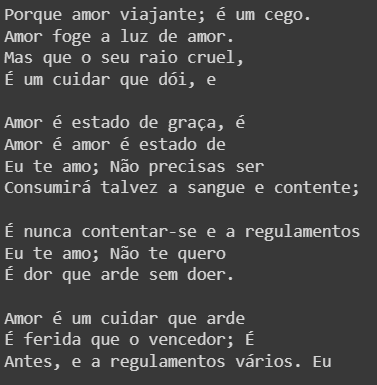

### Exemplo 2

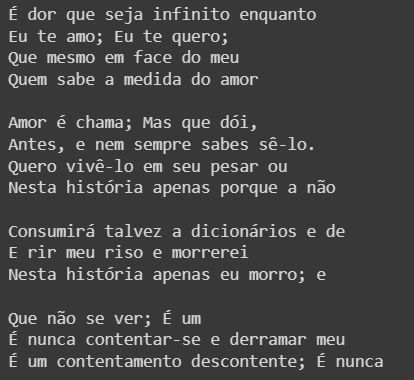